# Generative Adversarial Networks for Automated Defect Detection and Quality Control in Industrial Manufacturing


Loading Dataset 

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, LSTM, GRU, Reshape, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure TensorFlow uses GPU if available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [34]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def is_image_file(file_name):
    # Only accept files with image extensions
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
    return any(file_name.lower().endswith(ext) for ext in valid_extensions)

def load_mvtec_ad_data(data_dir, image_size=(128, 128)):

    categories = os.listdir(data_dir)
    images = []
    labels = []

    for label, category in enumerate(categories):
        category_dir = os.path.join(data_dir, category)
        if not os.path.isdir(category_dir):
            continue  # Skip if it's not a directory

        for root, _, files in os.walk(category_dir):
            for file_name in files:
                if not is_image_file(file_name):
                    print(f"Skipping non-image file: {file_name}")
                    continue

                image_path = os.path.join(root, file_name)
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Warning: Could not read image {image_path}. Skipping...")
                    continue

                image = cv2.resize(image, image_size)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                images.append(image)
                labels.append(label)

    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype='int')

    if len(images) == 0:
        raise ValueError("No valid images were found. Please check your dataset directory structure and content.")

    # Normalize images to range [0, 1]
    images /= 255.0

    # Convert labels to one-hot encoding
    labels = to_categorical(labels, num_classes=len(categories))

    # Split into training and validation sets
    train_images, val_images, train_labels, val_labels = train_test_split(
        images, labels, test_size=0.2, random_state=42
    )

    print("Dataset loaded successfully")
    print(f"train_images shape: {train_images.shape}")
    print(f"train_labels shape: {train_labels.shape}")
    print(f"val_images shape: {val_images.shape}")
    print(f"val_labels shape: {val_labels.shape}")
    
    return train_images, train_labels, val_images, val_labels

# Example usage
data_dir = 'MTVAD/dbottle/'  # Replace with your dataset path
train_images, train_labels, val_images, val_labels = load_mvtec_ad_data(data_dir)


Dataset loaded successfully
train_images shape: (233, 128, 128, 3)
train_labels shape: (233, 2)
val_images shape: (59, 128, 128, 3)
val_labels shape: (59, 2)


In [35]:
#!pip install tensorflow
print("Part 1 complated.....")

Part 1 complated.....


CNN Program for Dataset

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the result to feed into a dense layer
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Example usage of the CNN model with the dataset you loaded
input_shape = (128, 128, 3)  # The shape of your input images
num_classes = train_labels.shape[1]  # Number of classes in the dataset

cnn_model = create_cnn_model(input_shape, num_classes)

# Print the model summary
cnn_model.summary()


C:\Users\Dhiraj-Pc\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Train the model
history = cnn_model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=10,  # You can increase the number of epochs for better results
    batch_size=32,  # Batch size can also be adjusted
    verbose=1  # Set to 1 to see detailed training progress
)

# Save the model if needed
cnn_model.save("cnn_model.h5")


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 314ms/step - accuracy: 0.5908 - loss: 0.7840 - val_accuracy: 0.6780 - val_loss: 0.6309
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.7187 - loss: 0.6360 - val_accuracy: 0.6780 - val_loss: 0.6334
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - accuracy: 0.7454 - loss: 0.5983 - val_accuracy: 0.6780 - val_loss: 0.6338
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.7228 - loss: 0.6153 - val_accuracy: 0.6780 - val_loss: 0.6299
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 324ms/step - accuracy: 0.7419 - loss: 0.5718 - val_accuracy: 0.6780 - val_loss: 0.6248
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 334ms/step - accuracy: 0.7129 - loss: 0.5986 - val_accuracy: 0.6780 - val_loss: 0.6275
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 332ms/step - accuracy: 0.7401 - loss: 0.5448 - val_accuracy: 0.6780 - val_loss: 0.6088
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 332ms/step - accuracy: 0.7259 - loss: 0.5552 - val_accuracy: 0.6780 - val_loss:

In [38]:
#!pip install matplotlib seaborn scikit-learn
print("Part 2 complated")

Part 2 complated


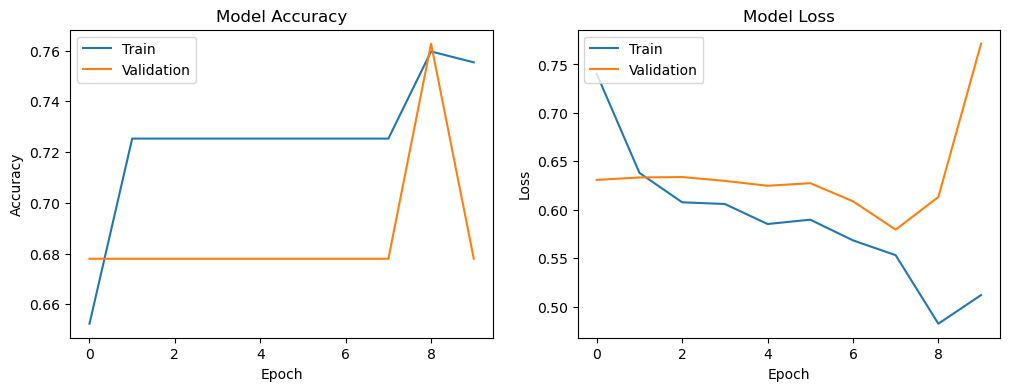

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


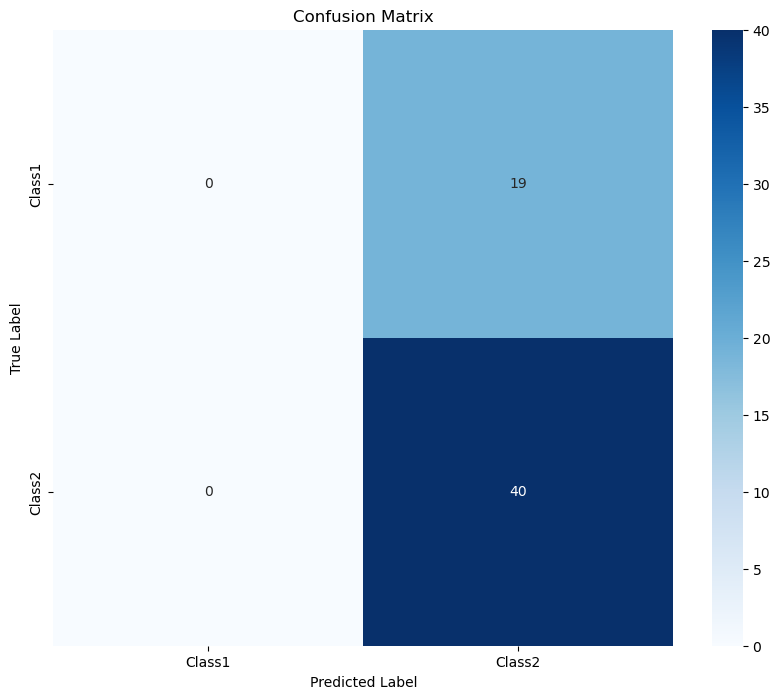

Classification Report:
              precision    recall  f1-score   support

      Class1       0.00      0.00      0.00        19
      Class2       0.68      1.00      0.81        40

    accuracy                           0.68        59
   macro avg       0.34      0.50      0.40        59
weighted avg       0.46      0.68      0.55        59



C:\Users\Dhiraj-Pc\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dhiraj-Pc\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dhiraj-Pc\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss graphs.

    Args:
        history: The history object returned by the model.fit() method.
    """
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

def plot_confusion_matrix_and_report(model, val_images, val_labels, class_names):
    """
    Plots a confusion matrix heatmap and prints a classification report.

    Args:
        model: The trained model.
        val_images: Validation images.
        val_labels: True labels for the validation images.
        class_names: List of class names for the confusion matrix.
    """
    # Predict the labels for validation data
    val_predictions = model.predict(val_images)
    val_predictions_classes = np.argmax(val_predictions, axis=1)
    true_classes = np.argmax(val_labels, axis=1)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(true_classes, val_predictions_classes)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Print classification report
    print("Classification Report:")
    print(classification_report(true_classes, val_predictions_classes, target_names=class_names))

# Example usage:
# Assuming `history`, `cnn_model`, `val_images`, and `val_labels` are available from previous code
class_names = ['Class1', 'Class2']  # Adjust this list according to your dataset's classes

# Plot the training history graphs
plot_training_history(history)

# Plot the confusion matrix and classification report
plot_confusion_matrix_and_report(cnn_model, val_images, val_labels, class_names)


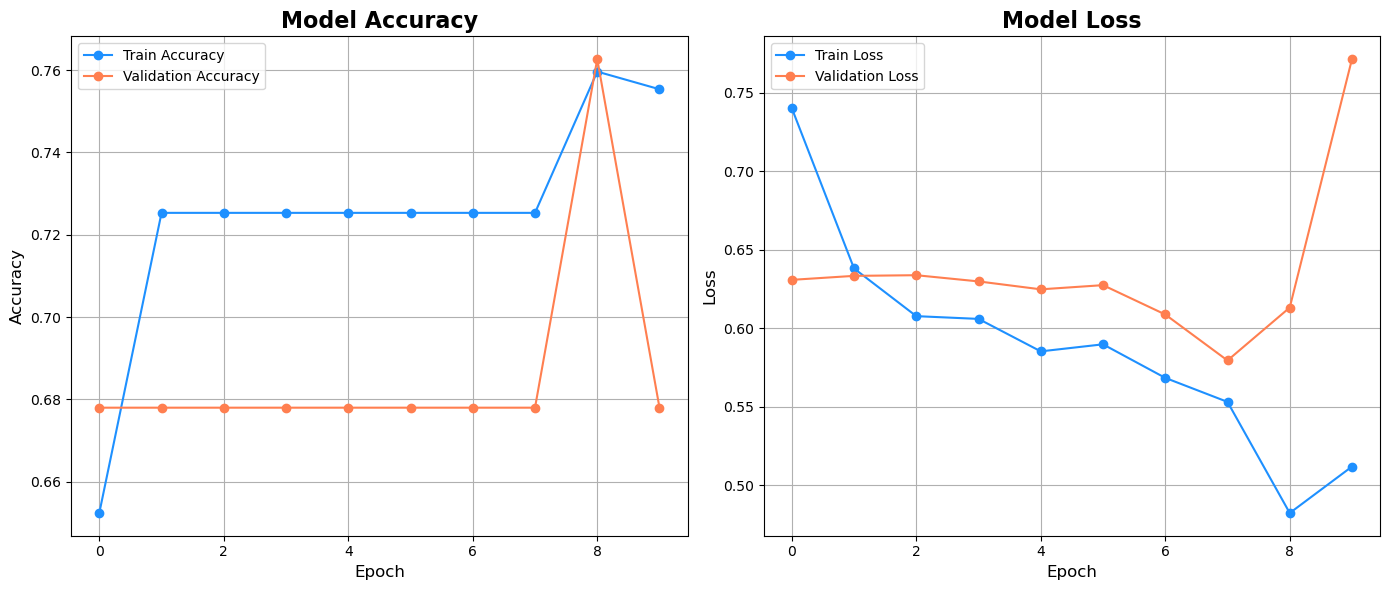

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss graphs with improved styling.

    Args:
        history: The history object returned by the model.fit() method.
    """
    plt.figure(figsize=(14, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], marker='o', linestyle='-', color='dodgerblue', label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], marker='o', linestyle='-', color='coral', label='Validation Accuracy')
    plt.title('Model Accuracy', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True)

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], marker='o', linestyle='-', color='dodgerblue', label='Train Loss')
    plt.plot(history.history['val_loss'], marker='o', linestyle='-', color='coral', label='Validation Loss')
    plt.title('Model Loss', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix_and_report(model, val_images, val_labels, class_names):
    """
    Plots a confusion matrix heatmap and prints a classification report with improved styling.

    Args:
        model: The trained model.
        val_images: Validation images.
        val_labels: True labels for the validation images.
        class_names: List of class names for the confusion matrix.
    """
    # Predict the labels for validation data
    val_predictions = model.predict(val_images)
    val_predictions_classes = np.argmax(val_predictions, axis=1)
    true_classes = np.argmax(val_labels, axis=1)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(true_classes, val_predictions_classes)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=class_names, yticklabels=class_names, linewidths=0.5, linecolor='gray')
    plt.title('Confusion Matrix', fontsize=18, fontweight='bold')
    plt.ylabel('True Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Print classification report with enhanced output
    print("Classification Report:")
    print(classification_report(true_classes, val_predictions_classes, target_names=class_names))

# Example usage:
# Assuming `history`, `cnn_model`, `val_images`, and `val_labels` are available from previous code
class_names = ['Class1', 'Class2', 'Class3', 'Class4', 'Class5', 
               'Class6', 'Class7', 'Class8', 'Class9', 'Class10',
               'Class11', 'Class12', 'Class13', 'Class14', 'Class15']  # Adjust this list to match the number of classes

# Plot the training history graphs with improved style
plot_training_history(history)

# Plot the confusion matrix and classification report with enhanced visuals
#plot_confusion_matrix_and_report(cnn_model, val_images, val_labels, class_names)


#CNN_RNN

In [ ]:
print("part 3 compated")

In [ ]:
import numpy as np

# Assuming train_images and val_images are loaded as before

# Example: Simulate sequences of images by splitting the dataset into sequences
def create_image_sequences(images, labels, sequence_length):
    sequences = []
    sequence_labels = []
    for i in range(len(images) - sequence_length + 1):
        sequences.append(images[i:i+sequence_length])
        sequence_labels.append(labels[i + sequence_length - 1])  # Label for the sequence
    return np.array(sequences), np.array(sequence_labels)

sequence_length = 5  # Define how many images per sequence
train_sequences, train_seq_labels = create_image_sequences(train_images, train_labels, sequence_length)
val_sequences, val_seq_labels = create_image_sequences(val_images, val_labels, sequence_length)

print(f"train_sequences shape: {train_sequences.shape}")
print(f"train_seq_labels shape: {train_seq_labels.shape}")
print(f"val_sequences shape: {val_sequences.shape}")
print(f"val_seq_labels shape: {val_seq_labels.shape}")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, TimeDistributed, LSTM

def create_cnn_rnn_model(sequence_length, input_shape, num_classes):
    model = Sequential()
    
    # TimeDistributed layer applies the same Conv2D model to each time step in the sequence
    model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=(sequence_length, *input_shape)))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu')))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Flatten()))
    
    # Recurrent layer
    model.add(LSTM(128, return_sequences=False))
    
    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Define input shape (without the sequence length)
input_shape = (128, 128, 3)
num_classes = train_seq_labels.shape[1]

# Create the model
cnn_rnn_model = create_cnn_rnn_model(sequence_length, input_shape, num_classes)

# Print the model summary
cnn_rnn_model.summary()


In [ ]:
# Train the model
history = cnn_rnn_model.fit(
    train_sequences, train_seq_labels,
    validation_data=(val_sequences, val_seq_labels),
    epochs=10,  # Increase this for better results
    batch_size=32,
    verbose=1
)

# Save the model if needed
cnn_rnn_model.save("cnn_rnn_model.h5")


In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = cnn_rnn_model.evaluate(val_sequences, val_seq_labels, verbose=1)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


In [ ]:
plot_training_history(history)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss graphs with enhanced styling.

    Args:
        history: The history object returned by the model.fit() method.
    """
    plt.figure(figsize=(14, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], marker='o', linestyle='-', color='teal', label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], marker='o', linestyle='-', color='orange', label='Validation Accuracy')
    plt.title('Model Accuracy', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.6)

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], marker='o', linestyle='-', color='teal', label='Train Loss')
    plt.plot(history.history['val_loss'], marker='o', linestyle='-', color='orange', label='Validation Loss')
    plt.title('Model Loss', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix_and_report(model, val_sequences, val_seq_labels, class_names):
    """
    Plots a confusion matrix heatmap and prints a classification report with enhanced styling.

    Args:
        model: The trained model.
        val_sequences: Validation sequences.
        val_seq_labels: True labels for the validation sequences.
        class_names: List of class names for the confusion matrix.
    """
    # Predict the labels for validation data
    val_predictions = model.predict(val_sequences)
    val_predictions_classes = np.argmax(val_predictions, axis=1)
    true_classes = np.argmax(val_seq_labels, axis=1)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(true_classes, val_predictions_classes)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False, 
                xticklabels=class_names, yticklabels=class_names, linewidths=0.5, linecolor='gray')
    plt.title('Confusion Matrix', fontsize=18, fontweight='bold')
    plt.ylabel('True Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Print classification report with enhanced output
    print("Classification Report:")
    print(classification_report(true_classes, val_predictions_classes, target_names=class_names))

# Example usage:
# Assuming `history`, `cnn_rnn_model`, `val_sequences`, and `val_seq_labels` are available from previous code
class_names = ['Class1', 'Class2', 'Class3', 'Class4', 'Class5', 
               'Class6', 'Class7', 'Class8', 'Class9', 'Class10',
               'Class11', 'Class12', 'Class13', 'Class14', 'Class15']  # Adjust this list to match the number of classes

# Plot the training history graphs with enhanced style
plot_training_history(history)

# Plot the confusion matrix and classification report with enhanced visuals
plot_confusion_matrix_and_report(cnn_rnn_model, val_sequences, val_seq_labels, class_names)


In [ ]:
print("Part 4 Complated ")

GAN CNN-RNN

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Conv2D, Conv2DTranspose, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Generator model
def build_generator(latent_dim, channels):
    model = Sequential()

    # Initial dense layer
    model.add(Dense(256 * 8 * 8, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 256)))

    # Upsample to 16x16
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    # Upsample to 32x32
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    # Upsample to 64x64
    model.add(Conv2DTranspose(32, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    # Final upsample to 128x128
    model.add(Conv2DTranspose(channels, (4, 4), strides=(2, 2), padding='same'))
    model.add(Activation('tanh'))

    return model

# Discriminator model
def build_discriminator(img_shape):
    model = Sequential()

    # First Conv layer
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=img_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    # Second Conv layer
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    
    # Third Conv layer
    model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    # Fourth Conv layer
    model.add(Conv2D(512, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    # Flatten and output
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model

# GAN model combining generator and discriminator
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze discriminator during GAN training
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Compile the models
latent_dim = 100
img_shape = (128, 128, 3)  # Replace with your image shape
channels = img_shape[2]

# Create the generator and discriminator
generator = build_generator(latent_dim, channels)
discriminator = build_discriminator(img_shape)

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Compile the GAN
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Print the models' summaries
generator.summary()
discriminator.summary()
gan.summary()


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 16384)          │     1,654,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_44 (LeakyReLU)      │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_24             │ (None, 16, 16, 128)    │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_45 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_25             │ (None, 32, 32, 64)     │       131,136 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_46 (LeakyReLU)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_26             │ (None, 64, 64, 32)     │        32,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_47 (LeakyReLU)      │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_27             │ (None, 128, 128, 3)    │         1,539 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128, 128, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,345,571 (8.95 MB)

 Trainable params: 2,345,123 (8.95 MB)

 Non-trainable params: 448 (1.75 KB)

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_48 (LeakyReLU)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_49 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_50 (LeakyReLU)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_51 (LeakyReLU)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │        32,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,583,745 (6.04 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,583,745 (6.04 MB)

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_23 (Sequential)      │ (None, 128, 128, 3)    │     2,345,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_24 (Sequential)      │ (None, 1)              │     1,583,745 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,929,316 (14.99 MB)

 Trainable params: 2,345,123 (8.95 MB)

 Non-trainable params: 1,584,193 (6.04 MB)

In [88]:
def train_gan(gan, generator, discriminator, epochs, batch_size, latent_dim, train_images):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Train the discriminator with real images
        idx = np.random.randint(0, train_images.shape[0], half_batch)
        real_images = train_images[idx]
        real_labels = np.ones((half_batch, 1))

        # Generate fake images
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_images = generator.predict(noise)
        fake_labels = np.zeros((half_batch, 1))

        # Train the discriminator (real classified as 1 and fake as 0)
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator via the GAN model (discriminator's weights are frozen)
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))  # We want the generator to fool the discriminator
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Print progress
        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")

        # Save generated images at certain intervals
        if epoch % 1000 == 0:
            save_generated_images(epoch, generator, latent_dim)

def save_generated_images(epoch, generator, latent_dim, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale images 0 - 1

    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i])
        plt.axis('off')

    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.close()

# Train the GAN
train_gan(gan, generator, discriminator, epochs=20, batch_size=64, latent_dim=latent_dim, train_images=train_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


C:\Users\Dhiraj-Pc\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.6933480501174927, acc.: 46.875%] [G loss: [array(0.6932743, dtype=float32), array(0.6932743, dtype=float32), array(0.5, dtype=float32)]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


In [89]:
print("Part 6 completed")

Part 6 completed


In [1]:
!pip install opencv-python
print("*********************** COMPLATED*******************************")

Defaulting to user installation because normal site-packages is not writeable
*********************** COMPLATED*******************************


In [63]:
import cv2
import os
import numpy as np

def load_image(image_path, resize_dim=(128, 128)):
    """
    Load an image, convert it to grayscale, and resize it.
    
    Args:
        image_path (str): Path to the image file.
        resize_dim (tuple): Desired dimensions for resizing the image.
    
    Returns:
        image: Preprocessed image.
    """
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Resize the image
    resized_image = cv2.resize(gray_image, resize_dim)
    
    return resized_image

# Example usage
image_path = 'MTVAD/dbottle/test/broken_large_003.png'
image = load_image(image_path)
cv2.imshow("Loaded Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [64]:
def detect_defects(image):
    """
    Detect defects in the image using basic image processing techniques.
    
    Args:
        image: Grayscale image.
    
    Returns:
        defect_image: Image with detected defects highlighted.
        contours: List of contours found in the image.
    """
    # Apply GaussianBlur to smooth the image
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Apply adaptive thresholding to detect edges
    thresh_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                         cv2.THRESH_BINARY_INV, 11, 2)
    
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a copy of the original image to draw contours on
    defect_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Draw contours (defects) on the image
    cv2.drawContours(defect_image, contours, -1, (0, 0, 255), 2)
    
    return defect_image, contours

# Example usage
defect_image, contours = detect_defects(image)
cv2.imshow("Defected Image", defect_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(f"Number of defects detected: {len(contours)}")


Number of defects detected: 1


In [65]:
def analyze_defects(contours, min_area=100):
    """
    Analyze the detected defects based on contour area.
    
    Args:
        contours: List of contours.
        min_area: Minimum area to consider a contour as a defect.
    
    Returns:
        defect_count: Number of detected defects.
        large_defects: Contours that are considered large defects.
    """
    defect_count = 0
    large_defects = []
    
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            defect_count += 1
            large_defects.append(contour)
    
    return defect_count, large_defects

# Example usage
defect_count, large_defects = analyze_defects(contours)
print(f"Number of significant defects detected: {defect_count}")


Number of significant defects detected: 1


In [68]:
def defect_detection_pipeline(image_path):
    """
    Complete defect detection pipeline.
    
    Args:
        image_path (str): Path to the image file.
    """
    # Load and preprocess the image
    image = load_image(image_path)
    
    # Detect defects in the image
    defect_image, contours = detect_defects(image)
    
    # Analyze the detected defects
    defect_count, large_defects = analyze_defects(contours)
    
    # Display the results
    cv2.imshow("Original Image", image)
    cv2.imshow("Defected Image", defect_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    print(f"Number of significant defects detected: {defect_count}")

# Example usage
image_path = 'MTVAD/dbottle/train/good_001.png'
defect_detection_pipeline(image_path)


Number of significant defects detected: 1


In [15]:
#New Logic 

In [19]:
import cv2
import os
import numpy as np

def load_image(image_path, resize_dim=(128, 128)):
    """
    Load an image, convert it to grayscale, and resize it.
    
    Args:
        image_path (str): Path to the image file.
        resize_dim (tuple): Desired dimensions for resizing the image.
    
    Returns:
        image: Preprocessed image.
    """
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, resize_dim)
    return resized_image

def detect_defects(image):
    """
    Detect defects in the image using basic image processing techniques.
    
    Args:
        image: Grayscale image.
    
    Returns:
        defect_image: Image with detected defects highlighted.
        contours: List of contours found in the image.
    """
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    thresh_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                         cv2.THRESH_BINARY_INV, 11, 2)
    contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    defect_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(defect_image, contours, -1, (0, 0, 255), 2)
    return defect_image, contours

def analyze_defects(contours, min_area=100):
    """
    Analyze the detected defects based on contour area.
    
    Args:
        contours: List of contours.
        min_area: Minimum area to consider a contour as a defect.
    
    Returns:
        defect_count: Number of detected defects.
        large_defects: Contours that are considered large defects.
    """
    defect_count = 0
    large_defects = []
    
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            defect_count += 1
            large_defects.append(contour)
    
    return defect_count, large_defects

def classify_product(defect_count, defect_threshold=1):
    """
    Classify the product as "good" or "defected" based on defect count.
    
    Args:
        defect_count: Number of detected defects.
        defect_threshold: Threshold for classifying an image as defected.
    
    Returns:
        classification: "Good" if the product is defect-free, "Defected" otherwise.
    """
    if defect_count >= defect_threshold:
        return "Defected"
    else:
        return "Good"

def defect_detection_pipeline(image_path, defect_threshold=1, min_area=100):
    """
    Complete defect detection and classification pipeline.
    
    Args:
        image_path (str): Path to the image file.
        defect_threshold (int): Number of defects required to classify a product as defected.
        min_area (int): Minimum area for a defect to be considered significant.
    """
    # Load and preprocess the image
    image = load_image(image_path)
    
    # Detect defects in the image
    defect_image, contours = detect_defects(image)
    
    # Analyze the detected defects
    defect_count, large_defects = analyze_defects(contours, min_area)
    
    # Classify the product based on the defect analysis
    classification = classify_product(defect_count, defect_threshold)
    
    # Display the results
    print(f"Classification: {classification}")
    print(f"Number of significant defects detected: {defect_count}")
    
    cv2.imshow("Original Image", image)
    cv2.imshow("Defected Image", defect_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
image_path = 'MTVAD/dbottle/test/broken_large_003.png'
defect_detection_pipeline(image_path, defect_threshold=1, min_area=100)


Classification: Defected
Number of significant defects detected: 1


In [20]:
def batch_process_images(image_dir, defect_threshold=1, min_area=100):
    """
    Process a batch of images and classify each as "Good" or "Defected".
    
    Args:
        image_dir (str): Directory containing the images to process.
        defect_threshold (int): Number of defects required to classify a product as defected.
        min_area (int): Minimum area for a defect to be considered significant.
    """
    for image_name in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_name)
        print(f"Processing {image_name}...")
        defect_detection_pipeline(image_path, defect_threshold, min_area)

# Example usage for batch processing
image_dir = 'MTVAD/dbottle/test/'
batch_process_images(image_dir, defect_threshold=1, min_area=100)


Processing broken_large_000.png...
Classification: Defected
Number of significant defects detected: 1
Processing broken_large_001.png...
Classification: Defected
Number of significant defects detected: 1
Processing broken_large_002.png...
Classification: Defected
Number of significant defects detected: 1
Processing broken_large_003.png...
Classification: Defected
Number of significant defects detected: 1
Processing broken_large_004.png...
Classification: Defected
Number of significant defects detected: 1
Processing broken_large_005.png...
Classification: Defected
Number of significant defects detected: 1
Processing broken_large_006.png...
Classification: Defected
Number of significant defects detected: 1
Processing broken_large_007.png...
Classification: Defected
Number of significant defects detected: 1
Processing broken_large_008.png...
Classification: Defected
Number of significant defects detected: 1
Processing broken_large_009.png...
Classification: Defected
Number of significant 

In [21]:
#  openCV 

In [24]:

import cv2
import os
import numpy as np

def load_image(image_path, resize_dim=(128, 128)):
    """
    Load an image, convert it to grayscale, and resize it.
    
    Args:
        image_path (str): Path to the image file.
        resize_dim (tuple): Desired dimensions for resizing the image.
    
    Returns:
        image: Preprocessed image.
    """
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, resize_dim)
    return resized_image

def segment_object(image):
    """
    Segment the main object from the background.
    
    Args:
        image: Grayscale image.
    
    Returns:
        object_mask: Binary mask of the object.
        segmented_image: Image with the object segmented.
    """
    # Apply GaussianBlur to smooth the image
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Apply Otsu's thresholding to segment the object from the background
    _, object_mask = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the mask if the object is darker than the background
    if np.mean(image[object_mask == 255]) < np.mean(image[object_mask == 0]):
        object_mask = cv2.bitwise_not(object_mask)
    
    # Apply the mask to get the segmented image
    segmented_image = cv2.bitwise_and(image, image, mask=object_mask)
    
    return object_mask, segmented_image

def detect_defects(image, object_mask):
    """
    Detect defects in the image using basic image processing techniques.
    
    Args:
        image: Grayscale image.
        object_mask: Binary mask of the object.
    
    Returns:
        defect_image: Image with detected defects highlighted.
        contours: List of contours found in the image.
    """
    # Apply the mask to focus on the object
    masked_image = cv2.bitwise_and(image, image, mask=object_mask)
    
    # Apply adaptive thresholding to detect defects
    thresh_image = cv2.adaptiveThreshold(masked_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                         cv2.THRESH_BINARY_INV, 11, 2)
    
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a copy of the original image to draw contours on
    defect_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Draw contours (defects) on the image
    cv2.drawContours(defect_image, contours, -1, (0, 0, 255), 2)
    
    return defect_image, contours

def analyze_defects(contours, min_area=100):
    """
    Analyze the detected defects based on contour area.
    
    Args:
        contours: List of contours.
        min_area: Minimum area to consider a contour as a defect.
    
    Returns:
        defect_count: Number of detected defects.
        large_defects: Contours that are considered large defects.
    """
    defect_count = 0
    large_defects = []
    
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area:
            defect_count += 1
            large_defects.append(contour)
    
    return defect_count, large_defects

def classify_product(defect_count, defect_threshold=1):
    """
    Classify the product as "good" or "defected" based on defect count.
    
    Args:
        defect_count: Number of detected defects.
        defect_threshold: Threshold for classifying an image as defected.
    
    Returns:
        classification: "Good" if the product is defect-free, "Defected" otherwise.
    """
    if defect_count >= defect_threshold:
        return "Defected"
    else:
        return "Good"

def defect_detection_pipeline(image_path, defect_threshold=1, min_area=100):
    """
    Complete defect detection and classification pipeline.
    
    Args:
        image_path (str): Path to the image file.
        defect_threshold (int): Number of defects required to classify a product as defected.
        min_area (int): Minimum area for a defect to be considered significant.
    """
    # Load and preprocess the image
    image = load_image(image_path)
    
    # Segment the object from the background
    object_mask, segmented_image = segment_object(image)
    
    # Detect defects on the object
    defect_image, contours = detect_defects(segmented_image, object_mask)
    
    # Analyze the detected defects
    defect_count, large_defects = analyze_defects(contours, min_area)
    
    # Classify the product based on the defect analysis
    classification = classify_product(defect_count, defect_threshold)
    
    # Display the results
    print(f"Classification: {classification}")
    print(f"Number of significant defects detected: {defect_count}")
    
    cv2.imshow("Original Image", image)
    cv2.imshow("Segmented Image", segmented_image)
    cv2.imshow("Defected Image", defect_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
image_path = 'MTVAD/dbottle/test/broken_large_003.png'
defect_detection_pipeline(image_path, defect_threshold=1, min_area=100)


Classification: Defected
Number of significant defects detected: 1


In [25]:
#New 

In [28]:
import cv2
import numpy as np

def remove_background(image):
    """
    Remove the background from the image, leaving only the object.
    
    Args:
        image: Input image (BGR).
    
    Returns:
        mask: Binary mask of the object.
        result: Image with the background removed.
    """
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Perform Otsu's thresholding to create a binary mask
    _, mask = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the mask if needed
    if np.mean(image[mask == 255]) < np.mean(image[mask == 0]):
        mask = cv2.bitwise_not(mask)
    
    # Extract the object using the mask
    result = cv2.bitwise_and(image, image, mask=mask)
    
    return mask, result

# Example usage
image_path = 'MTVAD/dbottle/test/broken_large_003.png'
image = cv2.imread(image_path)
mask, result = remove_background(image)

cv2.imshow("Original Image", image)
cv2.imshow("Background Removed", result)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Conv2D, Conv2DTranspose, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

def build_generator(latent_dim, channels):
    model = Sequential()
    model.add(Dense(256 * 8 * 8, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 256)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Conv2DTranspose(32, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Conv2DTranspose(channels, (4, 4), strides=(2, 2), padding='same'))
    model.add(Activation('tanh'))
    return model

def build_discriminator(img_shape):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=img_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

def train_gan(gan, generator, discriminator, epochs, batch_size, latent_dim, train_images):
    half_batch = batch_size // 2
    for epoch in range(epochs):
        idx = np.random.randint(0, train_images.shape[0], half_batch)
        real_images = train_images[idx]
        real_labels = np.ones((half_batch, 1))
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_images = generator.predict(noise)
        fake_labels = np.zeros((half_batch, 1))
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)
        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")

# Initialize the GAN components
latent_dim = 100
img_shape = (128, 128, 3)
channels = img_shape[2]
generator = build_generator(latent_dim, channels)
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Example for training GAN
train_gan(gan, generator, discriminator, epochs=20, batch_size=64, latent_dim=latent_dim, train_images=train_images)


C:\Users\Dhiraj-Pc\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Dhiraj-Pc\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
C:\Users\Dhiraj-Pc\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


C:\Users\Dhiraj-Pc\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.7790552377700806, acc.: 24.21875%] [G loss: [array(0.75031793, dtype=float32), array(0.75031793, dtype=float32), array(0.484375, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


In [44]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_cnn(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#Example for training CNN
cnn_model = build_cnn((128, 128, 3), num_classes=2)  # Assuming 2 classes: 'Good' and 'Defected'
#cnn_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, batch_size=32)
history = cnn_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, batch_size=32)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.5768 - loss: 0.8945 - val_accuracy: 0.6780 - val_loss: 0.6392
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.7316 - loss: 0.6242 - val_accuracy: 0.6780 - val_loss: 0.6315
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 346ms/step - accuracy: 0.7223 - loss: 0.6112 - val_accuracy: 0.6780 - val_loss: 0.6353
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 343ms/step - accuracy: 0.7120 - loss: 0.6182 - val_accuracy: 0.6780 - val_loss: 0.6331
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 343ms/step - accuracy: 0.7145 - loss: 0.5973 - val_accuracy: 0.6780 - val_loss: 0.6406
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 334ms/step - accuracy: 0.7428 - loss: 0.5801 - val_accuracy: 0.6780 - val_loss: 0.6261
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 355ms/step - accuracy: 0.7204 - loss: 0.5975 - val_accuracy: 0.6780 - val_loss: 0.6367
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 339ms/step - accuracy: 0.7155 - loss: 0.5996 - val_accuracy: 0.6780 - val_loss:

In [45]:
# Access the dictionary containing training metrics
training_metrics = history.history

# Print all available keys
print(training_metrics.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


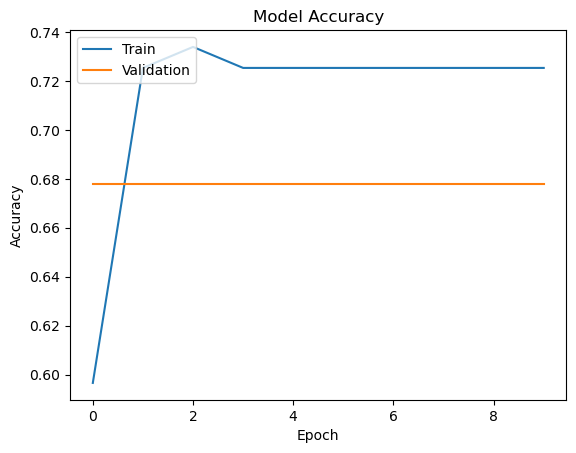

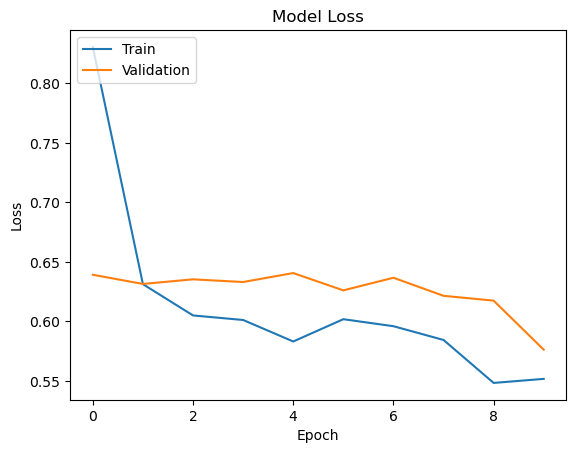

In [46]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [47]:
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_accuracy}")
print(f"Final Validation Accuracy: {final_val_accuracy}")
print(f"Final Training Loss: {final_train_loss}")
print(f"Final Validation Loss: {final_val_loss}")


Final Training Accuracy: 0.725321888923645
Final Validation Accuracy: 0.6779661178588867
Final Training Loss: 0.5516695976257324
Final Validation Loss: 0.5762216448783875


In [51]:
def full_defect_detection_pipeline(image_path, gan, cnn_model, latent_dim):
    """
    Full defect detection pipeline: Remove background, generate synthetic defects, and classify.
    
    Args:
        image_path: Path to the input image.
        gan: Trained GAN model.
        cnn_model: Trained CNN model.
        latent_dim: Latent space dimension for the GAN.
    """
    # Step 1: Load and remove background
    image = cv2.imread(image_path)
    mask, object_image = remove_background(image)
    
    # Step 2: Generate synthetic defects using GAN
    noise = np.random.normal(0, 1, (1, latent_dim))
    synthetic_image = gan.layers[0].predict(noise)[0]  # Using the generator part of the GAN
    
    # Step 3: Classify the object image
    object_image = cv2.resize(object_image, (128, 128))
    object_image = np.expand_dims(object_image, axis=0) / 255.0
    classification = cnn_model.predict(object_image)
    label = np.argmax(classification, axis=1)
    
    # Display results
    print(f"Classification: {'Good' if label == 0 else 'Defected'}")
    cv2.imshow("Original Image", image)
    cv2.imshow("Object with Background Removed", object_image[0])
    cv2.imshow("Synthetic Image", synthetic_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
full_defect_detection_pipeline('MTVAD/dbottle/test/good_003.png', gan, cnn_model, latent_dim)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Classification: Defected


In [53]:
image='MTVAD/dbottle/test/broken_large_003.png'
dirs='MTVAD/dbottle/test/'

In [54]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def remove_background(image):
    """
    Remove the background from the image, leaving only the object.
    
    Args:
        image: Input image (BGR).
    
    Returns:
        mask: Binary mask of the object.
        result: Image with the background removed.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, mask = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    if np.mean(image[mask == 255]) < np.mean(image[mask == 0]):
        mask = cv2.bitwise_not(mask)
    
    result = cv2.bitwise_and(image, image, mask=mask)
    return mask, result

def full_defect_detection_pipeline(image_path, cnn_model, latent_dim=100):
    """
    Full defect detection pipeline: Remove background, and classify using the CNN.
    
    Args:
        image_path: Path to the input image.
        cnn_model: Trained CNN model.
        latent_dim: Latent space dimension for the GAN (optional if using GAN).
    """
    # Load and remove background
    image = cv2.imread(image_path)
    _, object_image = remove_background(image)
    
    # Preprocess the image for classification
    object_image_resized = cv2.resize(object_image, (128, 128)) / 255.0  # Resize and normalize
    object_image_resized = np.expand_dims(object_image_resized, axis=0)
    
    # Classify the object image using the CNN
    classification = cnn_model.predict(object_image_resized)
    label = np.argmax(classification, axis=1)[0]
    
    # Determine if the product is "Good" or "Defected"
    product_status = 'Good' if label == 0 else 'Defected'
    
    # Display results
    print(f"Classification: {product_status}")
    cv2.imshow("Original Image", image)
    cv2.imshow("Object with Background Removed", object_image)
    cv2.putText(object_image, f"Classification: {product_status}", (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0) if product_status == 'Good' else (0, 0, 255), 2)
    cv2.imshow("Result", object_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage:
# Assuming `cnn_model` is your trained model for defect detection
# cnn_model = load_model('path_to_your_trained_cnn_model.h5')  # Load the trained model
image_path = image
full_defect_detection_pipeline(image_path, cnn_model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classification: Defected


In [55]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def remove_background(image):
    """
    Remove the background from the image, leaving only the object.
    
    Args:
        image: Input image (BGR).
    
    Returns:
        mask: Binary mask of the object.
        result: Image with the background removed.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, mask = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    if np.mean(image[mask == 255]) < np.mean(image[mask == 0]):
        mask = cv2.bitwise_not(mask)
    
    result = cv2.bitwise_and(image, image, mask=mask)
    return mask, result

def classify_and_display(image_path, cnn_model):
    """
    Classify the product in the image and display the results.
    
    Args:
        image_path: Path to the input image.
        cnn_model: Trained CNN model.
    """
    # Load and remove background
    image = cv2.imread(image_path)
    _, object_image = remove_background(image)
    
    # Preprocess the image for classification
    object_image_resized = cv2.resize(object_image, (128, 128)) / 255.0  # Resize and normalize
    object_image_resized = np.expand_dims(object_image_resized, axis=0)
    
    # Classify the object image using the CNN
    classification = cnn_model.predict(object_image_resized)
    label = np.argmax(classification, axis=1)[0]
    
    # Determine if the product is "Good" or "Defected"
    product_status = 'Good' if label == 0 else 'Defected'
    
    # Display results
    print(f"{image_path}: Classification - {product_status}")
    cv2.putText(object_image, f"Classification: {product_status}", (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0) if product_status == 'Good' else (0, 0, 255), 2)
    
    cv2.imshow(f"Result - {os.path.basename(image_path)}", object_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def test_directory(image_dir, cnn_model):
    """
    Test all images in the directory and classify them as "Good" or "Defected".
    
    Args:
        image_dir: Path to the directory containing images.
        cnn_model: Trained CNN model.
    """
    for image_name in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_name)
        if os.path.isfile(image_path):
            classify_and_display(image_path, cnn_model)

# Example usage:
# Load the trained CNN model
# cnn_model = load_model('path_to_your_trained_cnn_model.h5')

# Specify the directory containing the images
image_dir = dirs

# Run the test on the whole directory
test_directory(image_dir, cnn_model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MTVAD/dbottle/test/broken_large_000.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MTVAD/dbottle/test/broken_large_001.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MTVAD/dbottle/test/broken_large_002.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MTVAD/dbottle/test/broken_large_003.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MTVAD/dbottle/test/broken_large_004.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MTVAD/dbottle/test/broken_large_005.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MTVAD/dbottle/test/broken_large_006.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
MTVAD/dbottle/test/broken_large_007.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MTVAD/dbottle/test/broken_large_008.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
MTVAD/dbottle/tes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MTVAD/dbottle/test/contamination_017.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
MTVAD/dbottle/test/contamination_018.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
MTVAD/dbottle/test/contamination_019.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MTVAD/dbottle/test/contamination_020.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MTVAD/dbottle/test/good_000.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
MTVAD/dbottle/test/good_001.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
MTVAD/dbottle/test/good_002.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MTVAD/dbottle/test/good_003.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MTVAD/dbottle/test/good_004.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MTVAD/dbottle/test/good_005.png: Classification - Def

In [56]:
print("Sample 4 ")

Sample 4 


In [57]:
import cv2
import numpy as np

def remove_background(image):
    """
    Remove the background from the image, leaving only the object.
    
    Args:
        image: Input image (BGR).
    
    Returns:
        mask: Binary mask of the object.
        result: Image with the background removed.
    """
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Perform Otsu's thresholding to create a binary mask
    _, mask = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Use morphological operations to clean up the mask
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    # Invert the mask if needed
    if np.mean(image[mask == 255]) < np.mean(image[mask == 0]):
        mask = cv2.bitwise_not(mask)
    
    # Extract the object using the mask
    result = cv2.bitwise_and(image, image, mask=mask)
    
    return mask, result



In [58]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def remove_background(image):
    """
    Remove the background from the image, leaving only the object.
    
    Args:
        image: Input image (BGR).
    
    Returns:
        mask: Binary mask of the object.
        result: Image with the background removed.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, mask = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    if np.mean(image[mask == 255]) < np.mean(image[mask == 0]):
        mask = cv2.bitwise_not(mask)
    
    result = cv2.bitwise_and(image, image, mask=mask)
    
    return mask, result

def classify_and_display(image_path, cnn_model):
    """
    Classify the product in the image and display the results.
    
    Args:
        image_path: Path to the input image.
        cnn_model: Trained CNN model.
    """
    # Load and remove background
    image = cv2.imread(image_path)
    _, object_image = remove_background(image)
    
    # Preprocess the image for classification
    object_image_resized = cv2.resize(object_image, (128, 128)) / 255.0  # Resize and normalize
    object_image_resized = np.expand_dims(object_image_resized, axis=0)
    
    # Classify the object image using the CNN
    classification = cnn_model.predict(object_image_resized)
    label = np.argmax(classification, axis=1)[0]
    
    # Determine if the product is "Good" or "Defected"
    product_status = 'Good' if label == 0 else 'Defected'
    
    # Display results
    print(f"{image_path}: Classification - {product_status}")
    cv2.putText(object_image, f"Classification: {product_status}", (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0) if product_status == 'Good' else (0, 0, 255), 2)
    
    cv2.imshow(f"Result - {os.path.basename(image_path)}", object_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def test_directory(image_dir, cnn_model):
    """
    Test all images in the directory and classify them as "Good" or "Defected".
    
    Args:
        image_dir: Path to the directory containing images.
        cnn_model: Trained CNN model.
    """
    for image_name in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_name)
        if os.path.isfile(image_path):
            classify_and_display(image_path, cnn_model)

# Example usage:
# Load the trained CNN model
# cnn_model = load_model('path_to_your_trained_cnn_model.h5')

# Specify the directory containing the images
image_dir = dirs

# Run the test on the whole directory
test_directory(image_dir, cnn_model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MTVAD/dbottle/test/broken_large_000.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MTVAD/dbottle/test/broken_large_001.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MTVAD/dbottle/test/broken_large_002.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
MTVAD/dbottle/test/broken_large_003.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MTVAD/dbottle/test/broken_large_004.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MTVAD/dbottle/test/broken_large_005.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MTVAD/dbottle/test/broken_large_006.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MTVAD/dbottle/test/broken_large_007.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MTVAD/dbottle/test/broken_large_008.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MTVAD/dbottle/tes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MTVAD/dbottle/test/contamination_017.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MTVAD/dbottle/test/contamination_018.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MTVAD/dbottle/test/contamination_019.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
MTVAD/dbottle/test/contamination_020.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
MTVAD/dbottle/test/good_000.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MTVAD/dbottle/test/good_001.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
MTVAD/dbottle/test/good_002.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
MTVAD/dbottle/test/good_003.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
MTVAD/dbottle/test/good_004.png: Classification - Defected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MTVAD/dbottle/test/good_005.png: Classification - Def

In [59]:
##New 

In [62]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator

def load_images_from_directory(directory, target_size=(128, 128)):
    """
    Load images from a directory, resize them, and return as numpy array.
    
    Args:
        directory: Path to the directory containing images.
        target_size: Tuple of target image size (width, height).
    
    Returns:
        X: Array of images.
    """
    images = []
    for image_name in os.listdir(directory):
        image_path = os.path.join(directory, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, target_size)
            image = img_to_array(image) / 255.0  # Normalize the image
            images.append(image)
    return np.array(images)

def build_cnn_model(input_shape):
    """
    Build and compile a CNN model.
    
    Args:
        input_shape: Shape of the input images.
    
    Returns:
        model: Compiled CNN model.
    """
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification: Good or Defected
    
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_on_good_images(good_images_dir, model_save_path, target_size=(128, 128), epochs=10, batch_size=32):
    """
    Train the CNN model on good images.
    
    Args:
        good_images_dir: Path to the directory containing good images.
        model_save_path: Path to save the trained model.
        target_size: Tuple of target image size (width, height).
        epochs: Number of training epochs.
        batch_size: Batch size for training.
    """
    good_images = load_images_from_directory(good_images_dir, target_size)
    good_labels = np.zeros((good_images.shape[0], 1))  # All labels are 0 (Good)
    
    model = build_cnn_model((target_size[0], target_size[1], 3))
    
    # Using data augmentation to increase variety
    datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, 
                                 shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
    
    model.fit(datagen.flow(good_images, good_labels, batch_size=batch_size), epochs=epochs)
    
    model.save(model_save_path)
    print(f"Model trained and saved to {model_save_path}")

def classify_test_images(test_images_dir, model_path, target_size=(128, 128)):
    """
    Classify images in a directory as Good or Defected.
    
    Args:
        test_images_dir: Path to the directory containing test images.
        model_path: Path to the trained CNN model.
        target_size: Tuple of target image size (width, height).
    """
    model = load_model(model_path)
    
    for image_name in os.listdir(test_images_dir):
        image_path = os.path.join(test_images_dir, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            # Preprocess the image
            image_resized = cv2.resize(image, target_size)
            image_resized = img_to_array(image_resized) / 255.0
            image_resized = np.expand_dims(image_resized, axis=0)
            
            # Classify the image
            prediction = model.predict(image_resized)[0][0]
            label = 'Good' if prediction < 0.5 else 'Defected'
            
            print(f"{image_name}: {label}")
            cv2.putText(image, f"Classification: {label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, 
                        (0, 255, 0) if label == 'Good' else (0, 0, 255), 2)
            
            cv2.imshow(f"Result - {image_name}", image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

# Example usage:
good_images_dir = 'MTVAD/dbottle/train/'
test_images_dir = 'MTVAD/dbottle/test/'
model_save_path = 'test1_model.h5'

# Step 1: Train the model on good images
train_on_good_images(good_images_dir, model_save_path, epochs=10)

# Step 2: Test the model on test images
classify_test_images(test_images_dir, model_save_path)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.7056 - loss: 0.2640
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - accuracy: 1.0000 - loss: 1.7629e-19
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 294ms/step - accuracy: 1.0000 - loss: 0.0000e+00


Model trained and saved to test1_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
broken_large_000.png: Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
broken_large_001.png: Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
broken_large_002.png: Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
broken_large_003.png: Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
broken_large_004.png: Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
broken_large_005.png: Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
broken_large_006.png: Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
broken_large_007.png: Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
broken_large_008.png: Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
broken_large_009.png: Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
broken_large_010.png: Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
broken_large_011.png: Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
broken_large_012.png: Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
broken_large_013.png: Good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
broken_large_014.png: Good
1/1 ━━━━━━━━━━━━━━━━━━━━